# Tutorial 4  for JetSeT v1.2.0-rc3

## Composite Models

In [1]:
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED
from jetset.model_manager import FitModel


Composite models allow to combine together different models, such as Jet, and templates, including additive or multiplicative models, and give to the user the possibility to define the functional form of the model composition using a very simple and intuitive form such as:
```
   'jet1+jet2'*Franceschini_2008
```

that sums two jet models SEDs, and apply to both of them the `Franceschini_2008` EBL absorption.

Building composite models it is very easy. Composite models are handled by   the :class:`.FitModel` class, as shown by the following examples. 

## Combine a Jet model with the EBL model (Multiplicative case)

We start by combining a Jet model with the EBL absorption model, i.e. a multiplicative  model. First, we define our Jet model

In [2]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='plc',name='jet_flaring')

In [3]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [4]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


the waring message is just telling that you are not passing any specific cosmology model to the `FitModel` class, so it is using a default one

In [5]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [6]:
composite_model.link_par(par_name='z_cosm', from_model='jet_flaring', to_model='Franceschini_2008')


==> par: z_cosm from model: jet_flaring linked to same parameter in model Franceschini_2008


In [7]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,"z_cosm(L,Franceschini_2008)",redshift,,--,--,--,False,True
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


As you can see, now the paramter `z_cosm` in `jet_flaring` is the root parameter (flagged by the R in parenthesis), and the one belonging to the `Franceschini_2008` component is the linked one (flagged by the L in parenthesis).

## Setting parameters

---
**NOTE**
   
with the new implementation of composite model  (`FitModel` class) to set parameters you have to specify the model component, this is different from versions<1.2.0

---

These methods are alternative and equivalent ways to set a parameter in a composite model:

a) accessing the model component member of the 

b) using `set_par` and passing as first argument the model component name

c) using `set_par` and passing as first argument the model component object

In [8]:
#a
composite_model.Franceschini_2008.parameters.z_cosm.val=0.78
#b
#composite_model.set_par('jet_flaring','z_cosm',1.84)
#c
#composite_model.set_par(my_jet,'z_cosm',1.84)

And now, we can define the functional form of the model composition, just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [9]:
composite_model.show_model()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: jet_flaring model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_flaring  

electrons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,"z_cosm(L,Franceschini_2008)",redshift,,--,--,--,False,True
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: Franceschini_2008  
type: table2D  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
Franceschini_2008,z_cosm(M),redshift,,7.800000e-01,0.000000e+00,--,False,True


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [10]:
composite_model.composite_expr='jet_flaring*Franceschini_2008'

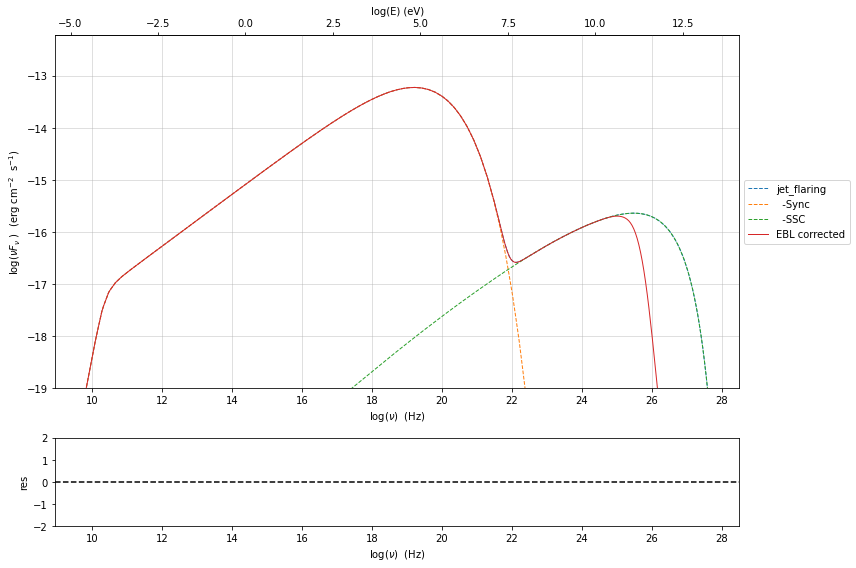

In [11]:
composite_model.jet_flaring.IC_nu_size=350
composite_model.jet_flaring.parameters.gamma_cut.val=1E6
composite_model.jet_flaring.parameters.B.val=1
composite_model.jet_flaring.parameters.gmax.val=1E8
#composite_model.jet_flaring.flux_plot_lim=0

composite_model.jet_flaring._blob.IC_adaptive_e_binning=1
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_min=-19)

In [12]:
%matplotlib widget
composite_model.Franceschini_2008.plot_model()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
composite_model.jet_flaring.eval()
composite_model.jet_flaring.plot_model()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Sum of two jets (steady and flaring) and application of the EBL absorption to both (Multiplicative and additive)

Assume that now we want to sum to jet models (a steady and flaring component) and apply to both of them the EBL absorption.

In [14]:
composite_model=FitModel(nu_size=500,name='EBL corrected flaring+steady')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)

/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


In [15]:
steady_jet=Jet(electron_distribution='plc',name='steady_jet')
composite_model.add_component(steady_jet)
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected flaring+steady  
type: composite_model  
components models:
 -model name: jet_flaring model type: jet
 -model name: Franceschini_2008 model type: table2D
 -model name: steady_jet model type: jet

--------------------------------------------------------------------------------


In [16]:
composite_model.link_par(par_name='z_cosm', from_model='steady_jet', to_model='Franceschini_2008')


==> par: z_cosm from model: steady_jet linked to same parameter in model Franceschini_2008


In [17]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e+00,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,"z_cosm(L,Franceschini_2008)",redshift,,--,--,--,False,True
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+09,False,False
jet_flaring,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


In [18]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e+00,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,"z_cosm(L,Franceschini_2008)",redshift,,--,--,--,False,True
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+09,False,False
jet_flaring,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


In [19]:
composite_model.steady_jet.IC_nu_size=150


In [20]:
composite_model.composite_expr="(jet_flaring + steady_jet) * Franceschini_2008"

In [21]:
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_max=-12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
composite_model.save_model('composite.pkl')

In [23]:
cm=FitModel.load_model('composite.pkl')

==> par: z_cosm from model: jet_flaring linked to same parameter in model Franceschini_2008
==> par: z_cosm from model: steady_jet linked to same parameter in model Franceschini_2008


In [24]:
p=cm.plot_model()
p.rescale(y_max=-12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …